In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
df = pd.read_excel("https://github.com/sureshHARDIYA/phd-resources/blob/master/Data/Review%20Paper/acm/preprocessed.xlsx?raw=true")
df.head(10)

,Unnamed: 0,Abstract,Author,Doi,Journal,Title,Year
0,786,NaN,Rachel D. Williams,NaN,American Society for Information Science,“we’re not allowed”: public librarians’ perspe...,2016
1,885,NaN,Ghassan F. Bati,NaN,Association for Computing Machinery,“trust us”: mobile phone use patterns can pred...,2018
2,1083,NaN,Alex Leavitt,NaN,Association for Computing Machinery,“this is a throwaway account”: temporary techn...,2015
3,1004,NaN,Yngve Dahl,NaN,Association for Computing Machinery,“there are no secrets here!”: professional sta...,2012
4,899,NaN,Max Van Kleek,NaN,Association for Computing Machinery,“the crowd keeps me in shape”: social psycholo...,2013
5,1282,NaN,Tawfiq Ammari,NaN,Association for Computing Machinery,“thanks for your interest in our facebook grou...,2016
6,434,NaN,Kathleen O’Leary,NaN,Association for Computing Machinery,"“suddenly, we got to become therapists for eac...",2018
7,1168,NaN,Cara Wilson,NaN,Association for Computing Machinery,“put yourself in the picture”: designing for f...,2016
8,1238,NaN,Sarah Martindale,NaN,Association for Computing Machinery,“proof in the pudding”: designing iot plants t...,2017
9,1272,NaN,Margaret C. Jack,NaN,Association for Computing Machinery,"“privacy is not a concept, but a way of dealin...",2019


In [0]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df.Title)
text = tfidf.transform(df.Title)

Fitting 2 clusters
Fitting 4 clusters
Fitting 6 clusters
Fitting 8 clusters
Fitting 10 clusters
Fitting 12 clusters
Fitting 14 clusters
Fitting 16 clusters
Fitting 18 clusters
Fitting 20 clusters


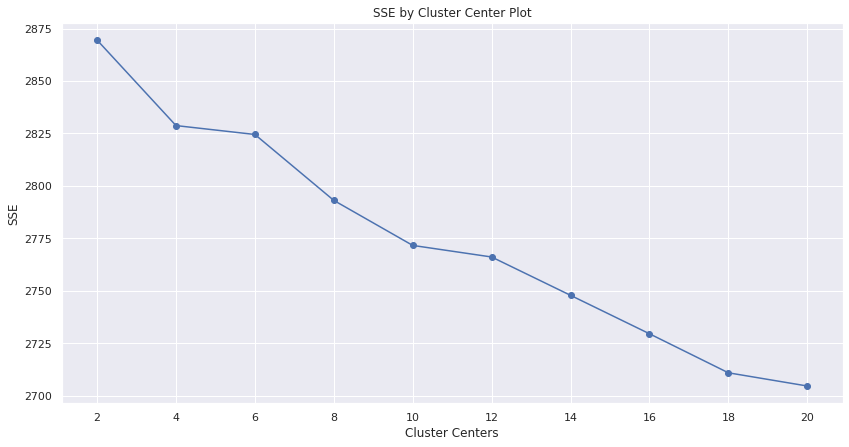

In [5]:
def generate_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fitting {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
generate_optimal_clusters(text, 20)

In [0]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

Text(0.5, 1.0, 'Generated TSNE Cluster Plot')

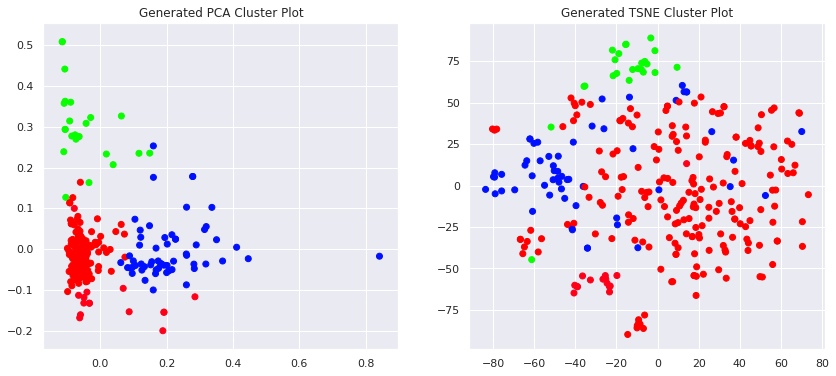

In [8]:
max_label = max(clusters)
max_items = np.random.choice(range(text.shape[0]), size=3000, replace=True)
pca = PCA(n_components=2).fit_transform(text[max_items,:].todense())
tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(text[max_items,:].todense()))

idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)
label_subset = clusters[max_items]
label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
ax[0].set_title('Generated PCA Cluster Plot')

ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
ax[1].set_title('Generated TSNE Cluster Plot')



Cluster 0 

bipolar,patient,framework,evaluation,risk,older,internet,healthcare,activity,approach,online,anxiety,research,digital,children,assessment,clinical,dementia,adaptive,cognitive,intervention,disorders,technology,learning,psychiatric,community,interventions,management,therapy,review,adults,use,support,designing,schizophrenia,stress,data,people,analysis,care,self,mobile,disorder,using,patients,design,study,treatment,based,depression
Cluster 1 

cessation,brief,comparing,single,disorder,people,adults,symptoms,risk,clinical,women,prevention,reduce,improve,training,use,results,online,personalized,internet,cluster,alcohol,anxiety,feedback,efficacy,patients,health,mental,therapy,primary,help,self,program,care,effects,cognitive,pilot,treatment,depression,tailored,effectiveness,web,based,randomised,study,intervention,protocol,randomized,controlled,trial
Cluster 2 

qualitative,physical,digital,implementation,self,medical,management,patient,adults,designing,life,quality,work,development

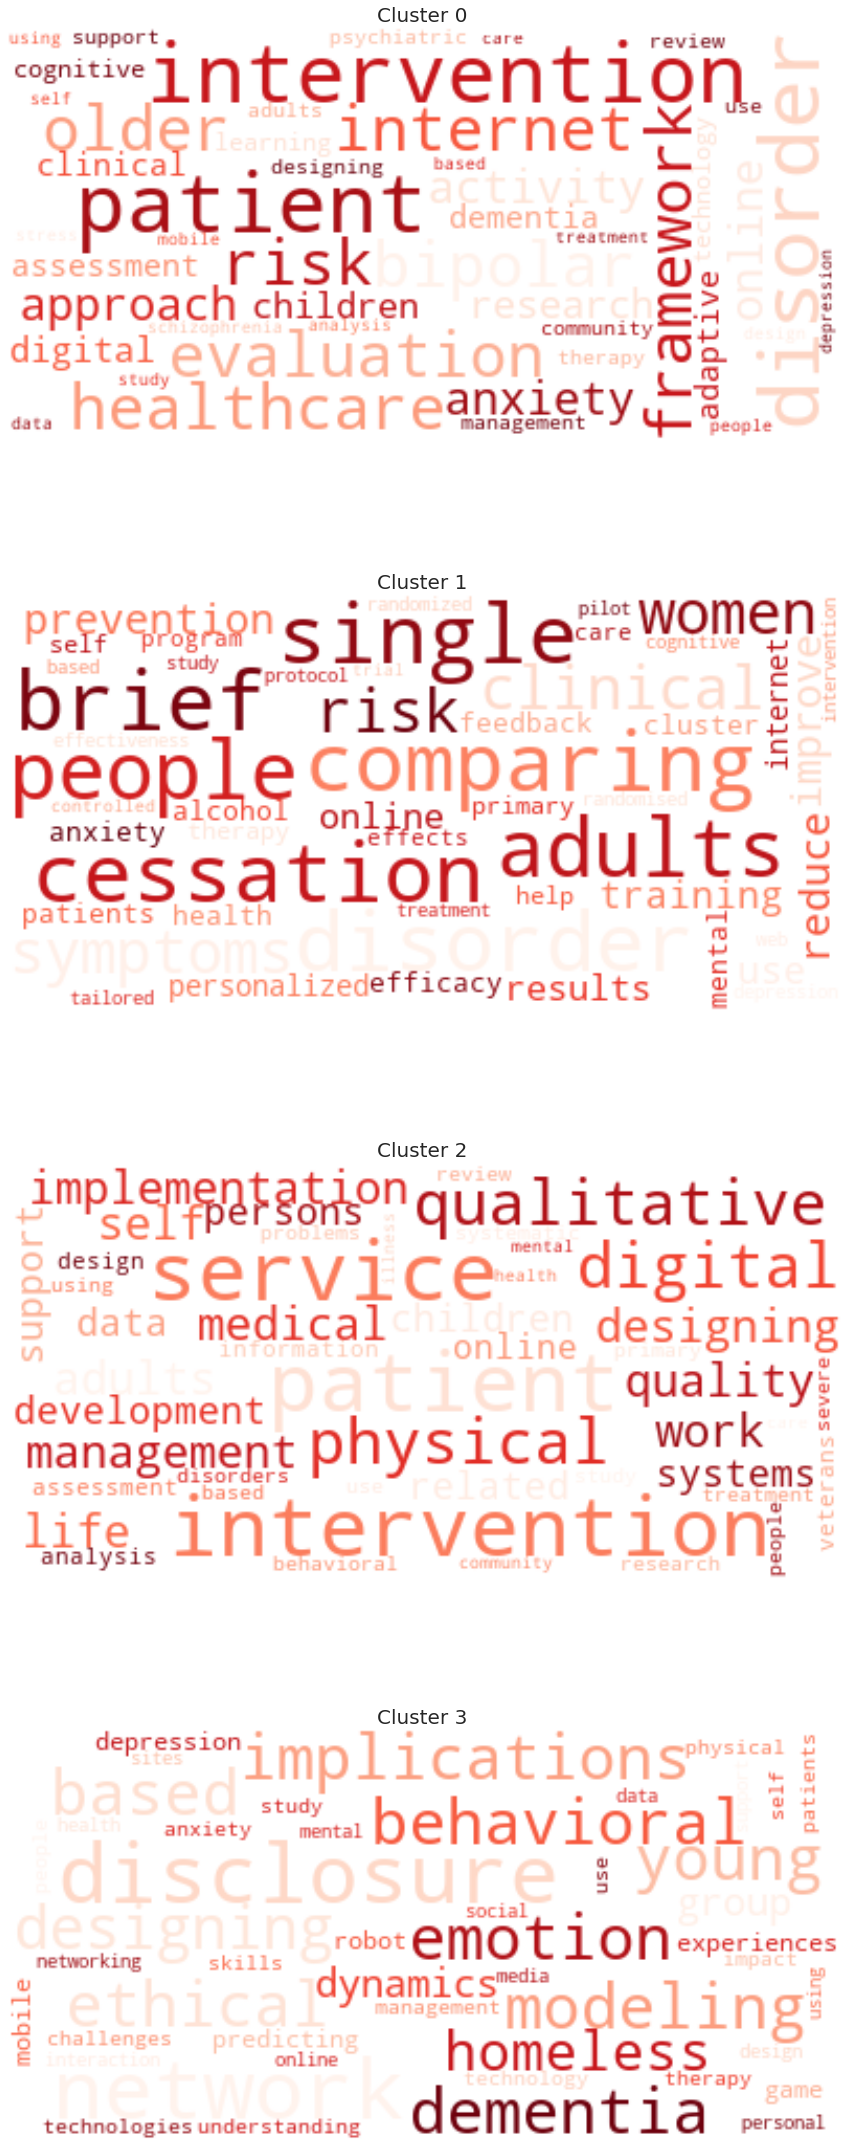

In [11]:
from wordcloud import WordCloud 

fig, ax = plt.subplots(4, sharex=True, figsize=(15,10*4))

plt.rcParams["axes.grid"] = False

def high_frequency_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
      words = ','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
      print('Cluster {} \n'.format(i))
      print(words)
      wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'Reds', background_color = 'white').generate(words)
      ax[i].imshow(wordcloud, interpolation='bilinear')
      ax[i].set_title('Cluster {} '.format(i), fontsize = 20)  
      ax[i].axis('off')     
high_frequency_keywords(text, clusters, tfidf.get_feature_names(), 50)